# Read and tidy Data

In [1]:
import pandas as pd
import sys,os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
image_path = "D:/Projects/CK_plus/datasets/images"
label_path = "D:/Projects/CK_plus/datasets/Emotion"

In [3]:
emotion_data = pd.read_csv("Emotiona.csv")
emotion_data = emotion_data[["emotion","label","num"]]

emotion_data = emotion_data.rename(index=str, columns={"emotion": "em_id","label":"emotion", "num": "img_num"})
emotion_data.head()

,em_id,emotion,img_num
0,S005_001_00000011,3,11
1,S010_002_00000014,7,14
2,S010_004_00000019,1,19
3,S010_006_00000015,5,15
4,S011_001_00000016,7,16


In [4]:
def read_images(emotion_path,image_path=image_path,last=5):
    emotion_path = emotion_path.split("_")
    images = os.path.join(image_path,emotion_path[0],emotion_path[1])
    image_list = []
    for img in os.listdir(images): 
        img = os.path.join(images,img)
        image_list.append(img) 
    image_list.sort()
    return image_list[last:] 

In [5]:
image_data = pd.DataFrame(columns=['img_id','em_id','emotion','img_num'])

In [6]:
for i in range(emotion_data.shape[0]):
    img_list = read_images(emotion_data.iloc[i].em_id)
    for img in img_list:
        path, file_name = os.path.split(img)
        file_name =  file_name.replace(".png","")
        img_data = {'img_id':file_name,
                   'em_id':emotion_data.iloc[i].em_id,
                   'emotion':emotion_data.iloc[i].emotion,
                   'img_num':emotion_data.iloc[i].img_num}
        image_data = image_data.append(img_data,ignore_index=True )

In [7]:
image_data.head()

,img_id,em_id,emotion,img_num
0,S005_001_00000006,S005_001_00000011,3,11
1,S005_001_00000007,S005_001_00000011,3,11
2,S005_001_00000008,S005_001_00000011,3,11
3,S005_001_00000009,S005_001_00000011,3,11
4,S005_001_00000010,S005_001_00000011,3,11


In [8]:
image_data.tail()

,img_id,em_id,emotion,img_num
4237,S999_003_00000051,S999_003_00000055,4,55
4238,S999_003_00000052,S999_003_00000055,4,55
4239,S999_003_00000053,S999_003_00000055,4,55
4240,S999_003_00000054,S999_003_00000055,4,55
4241,S999_003_00000055,S999_003_00000055,4,55


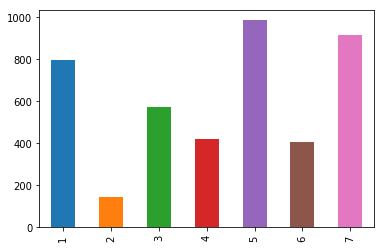

In [9]:
image_data.emotion.value_counts()[[1,2,3,4,5,6,7]].plot(kind="bar");

In [10]:
image_data.shape

(4242, 4)

In [11]:
image_data.to_csv("img_data.csv")